Road Crashes Fatalities in Australia

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from __future__ import division

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 10)

In [3]:
saved_style_state = matplotlib.rcParams.copy()

In [4]:
filepath = "http://data.gov.au/dataset/5b530fb8-526e-4fbf-b0f6-aa24e84e4277/resource/fd646fdc-7788-4bea-a736-e4aeb0dd09a8/download/fatalitiesmar2017.csv"
print "loading data"
fatal_data = pd.read_csv(filepath)
print "done"

loading data
done


In [5]:
fatal_data.head(16)

,CrashID,State,Day,Month,Year,Hour,Minute,Crash_Type,Bus_Involvement,Heavy_Rigid_Truck_Involvement,Articulated_Truck_Involvement,Speed_Limit,Road_User,Gender,Age
0,3201701010001,QLD,1,January,2017,0,0,Pedestrian,No,No,No,50,Pedestrian,Female,64
1,5201701010001,WA,1,January,2017,16,30,Multiple vehicle,No,No,No,100,Motorcycle rider,Male,21
2,5201701010002,WA,1,January,2017,17,14,Multiple vehicle,No,No,No,70,Driver,Male,25
3,3201701020002,QLD,2,January,2017,3,0,Pedestrian,No,No,No,100,Pedestrian,Female,30
4,1201701020002,NSW,2,January,2017,13,15,Multiple vehicle,No,No,No,80,Motorcycle rider,Male,26
5,5201701020003,WA,2,January,2017,18,27,Single vehicle,No,No,No,110,Driver,Male,24
6,1201701020001,NSW,2,January,2017,18,10,Single vehicle,No,No,No,50,Driver,Male,28
7,1201701030003,NSW,3,January,2017,14,15,Multiple vehicle,No,Yes,Yes,100,Driver,Male,29
8,1201701030003,NSW,3,January,2017,14,15,Multiple vehicle,No,Yes,Yes,100,Driver,Male,52
9,5201701030004,WA,3,January,2017,15,21,Multiple vehicle,No,No,No,70,Motorcycle rider,Male,23


In [6]:
fatal_data.columns

Index([u'CrashID', u'State', u'Day', u'Month', u'Year', u'Hour', u'Minute',
       u'Crash_Type', u'Bus_Involvement', u'Heavy_Rigid_Truck_Involvement',
       u'Articulated_Truck_Involvement', u'Speed_Limit', u'Road_User',
       u'Gender', u'Age'],
      dtype='object')

In [7]:
row = fatal_data.iloc[28563]
row

CrashID                             1199810290408
State                                         NSW
Day                                            29
Month                                     October
Year                                         1998
Hour                                           22
Minute                                         10
Crash_Type                       Multiple vehicle
Bus_Involvement                                No
Heavy_Rigid_Truck_Involvement             Unknown
Articulated_Truck_Involvement                 Yes
Speed_Limit                                   100
Road_User                                  Driver
Gender                                       Male
Age                                            29
Name: 28563, dtype: object

Month Of Fatalities

In [9]:
fatal_data["Month"].value_counts()

December     4291
March        4244
October      4135
August       4016
November     3994
May          3986
April        3952
January      3932
September    3875
June         3874
July         3827
February     3614
Name: Month, dtype: int64

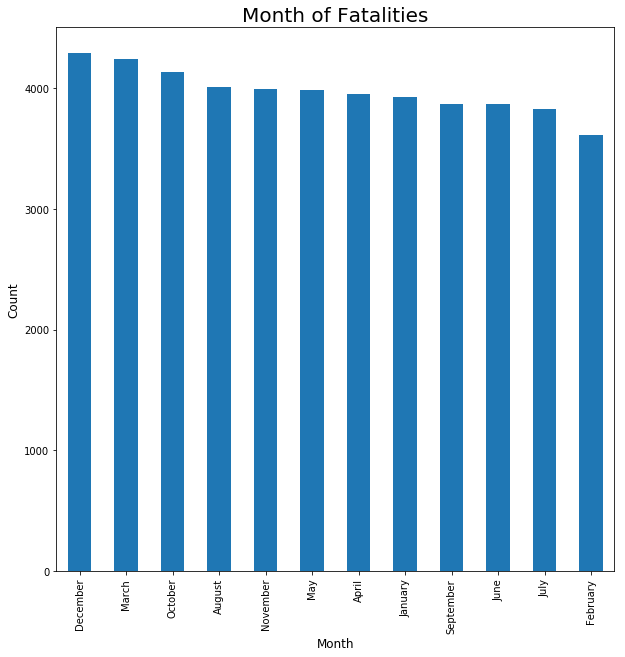

In [85]:
fatal_data["Month"].value_counts().plot(kind="bar")
plt.title("Month of Fatalities", fontsize=20)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Count", fontsize=12)

Year Of Fatalities

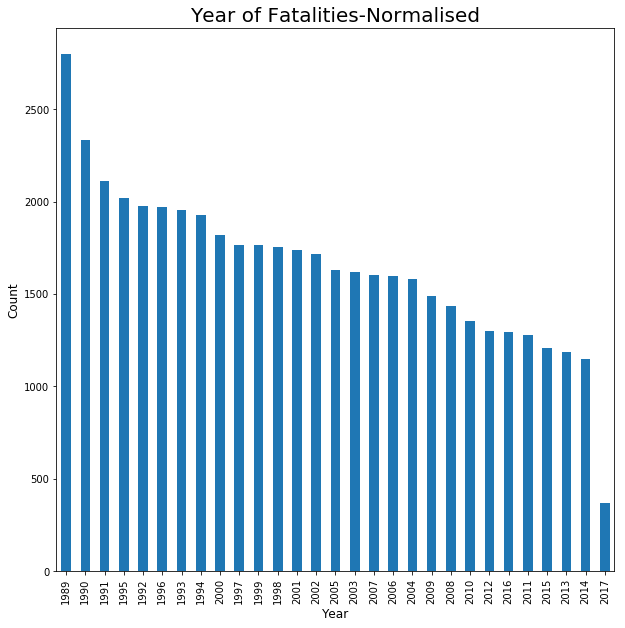

In [84]:
fatal_data["Year"].value_counts().plot(kind="bar")
plt.title("Year of Fatalities-Normalised", fontsize=20)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Count", fontsize=12)

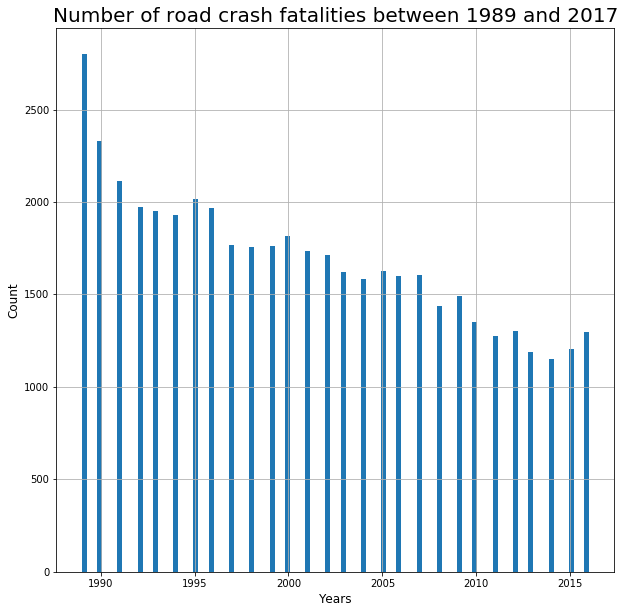

In [57]:
number_of_bins = 100
lower_bound = 1989
upper_bound = 2016

plt.hist(fatal_data["Year"], bins=number_of_bins, range=(lower_bound, upper_bound))
plt.title("Number of road crash fatalities between {} and {}".format("1989", "2017"), fontsize=20)
plt.xlabel('Years', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(True)
plt.show()

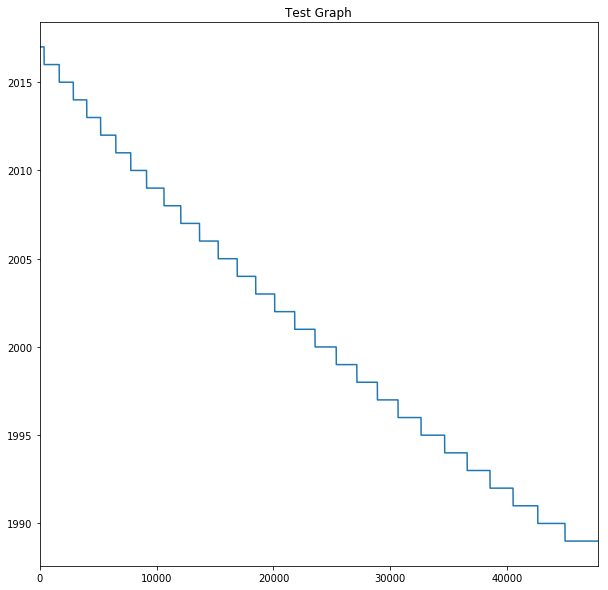

In [83]:
fatal_data["Year"].plot()
plt.title("Test Graph")

State Of Fatalities

In [13]:
fatal_data["State"].value_counts()

NSW    14833
VIC    10527
QLD     9368
WA      5578
SA      4114
NT      1479
TAS     1398
ACT      443
Name: State, dtype: int64

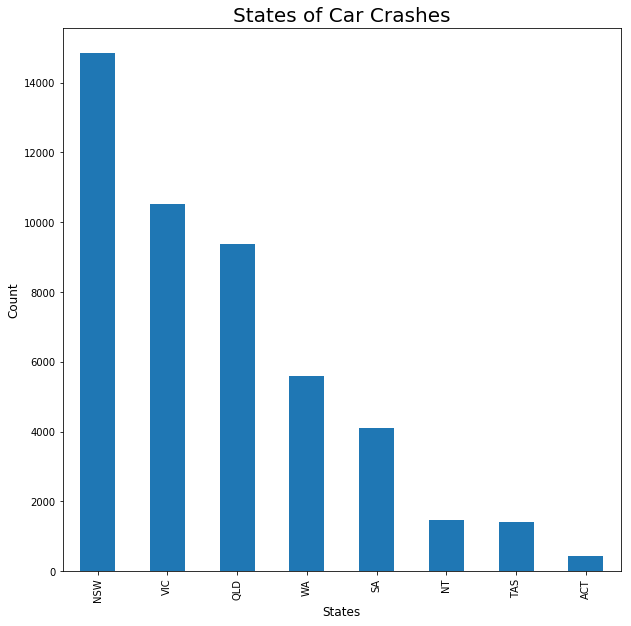

In [82]:
fatal_data["State"].value_counts().plot(kind="bar")
plt.title("States of Car Crashes", fontsize=20)
plt.xlabel("States", fontsize=12)
plt.ylabel("Count", fontsize=12)

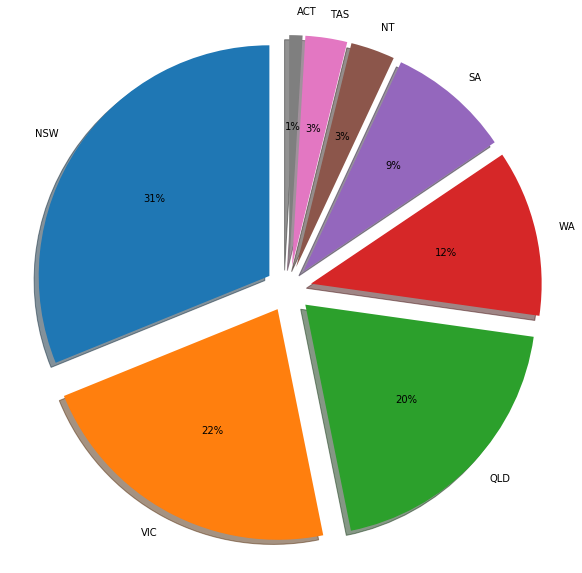

In [15]:
labels = 'NSW', 'VIC', 'QLD', 'WA', 'SA', 'NT', 'TAS', 'ACT'
sizes = [(14883/47740), (10527/47740), (9368/47740), (5578/47740), (4114/47740), (1479/47740), (1398/47740), (443/47740)]
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.0f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

Age of Fatalities

In [16]:
fatal_data["Age"].value_counts()

 18     1829
 19     1662
 20     1656
 21     1484
 22     1317
 23     1300
 17     1298
 25     1131
 24     1109
 26     1052
 27      968
 29      917
 28      913
 30      862
 32      828
 31      825
 33      783
 36      777
 34      708
 16      699
 40      687
 35      678
 38      636
 39      635
 37      634
 41      630
 43      579
 45      572
 46      568
 42      564
        ... 
 86      208
 13      207
 2       196
 5       182
 4       178
 1       177
 3       177
 8       174
 10      172
 87      168
 12      161
 6       151
 9       150
 88      147
 11      145
 7       143
 89      110
 90      106
-9        81
 91       69
 92       59
 93       46
 94       31
 96       19
 97       13
 95       12
 98        5
 99        5
 100       1
 101       1
Name: Age, Length: 103, dtype: int64

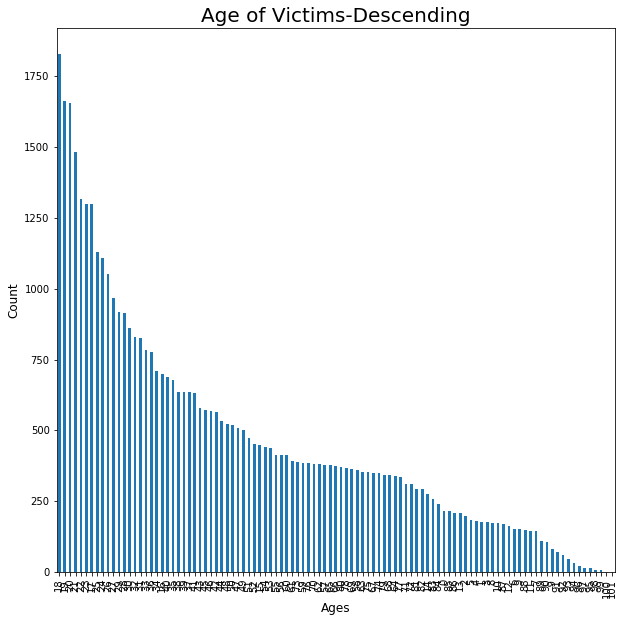

In [81]:
fatal_data["Age"].value_counts().plot(kind="bar")
plt.title("Age of Victims-Descending", fontsize=20)
plt.ylabel("Count", fontsize=12)
plt.xlabel("Ages", fontsize=12)

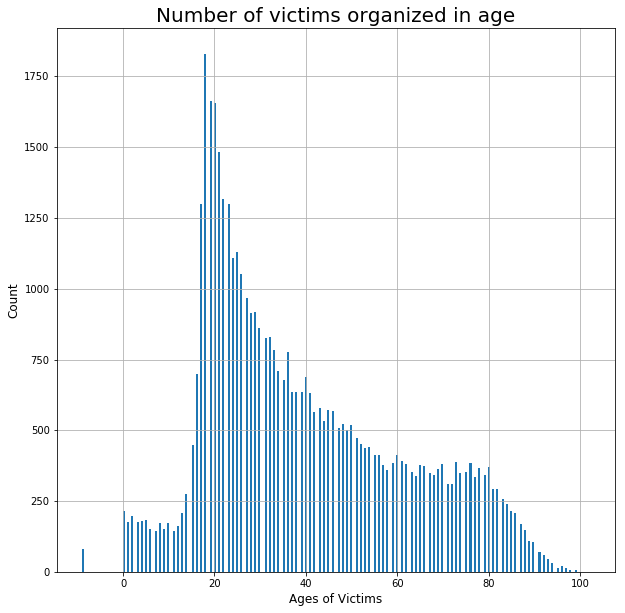

In [77]:
number_of_bins = 250
lower_bound = -9
upper_bound = 102

plt.hist(fatal_data["Age"], bins=number_of_bins, range=(lower_bound, upper_bound))
plt.title("Number of victims organized in age", fontsize=20)
plt.xlabel('Ages of Victims', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(True)
plt.show()

Most Common Speeds

In [19]:
fatal_data["Speed_Limit"].value_counts()

 100    16615
 60     12824
 80      5376
 110     5325
 50      2290
 70      2258
 90      1038
-9        735
 900      614
 40       260
 75       254
 130       92
 20        22
 10        16
 30        12
 25         5
 8          1
 777        1
 888        1
 45         1
Name: Speed_Limit, dtype: int64

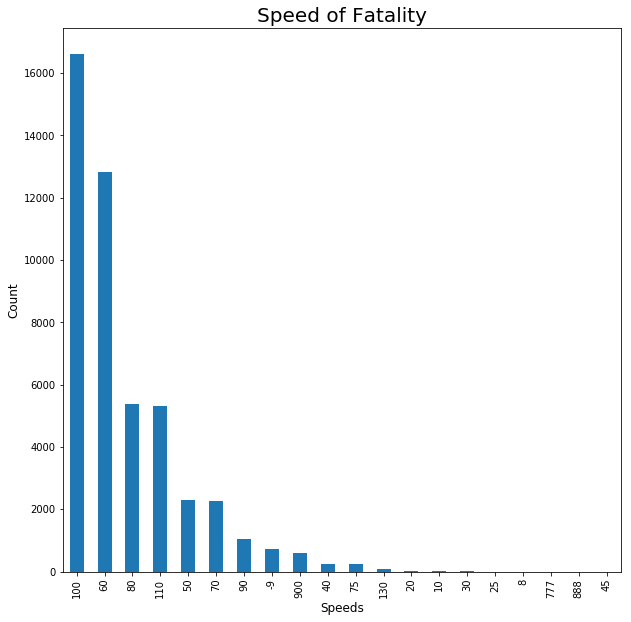

In [80]:
speed_limit = fatal_data["Speed_Limit"].value_counts().plot(kind="bar")
plt.title("Speed of Fatality", fontsize=20)
plt.xlabel("Speeds", fontsize=12)
plt.ylabel("Count", fontsize=12)

Gender of Fatality

In [21]:
fatal_data["Gender"].value_counts()

Male       34027
Female     13691
Unknown       22
Name: Gender, dtype: int64

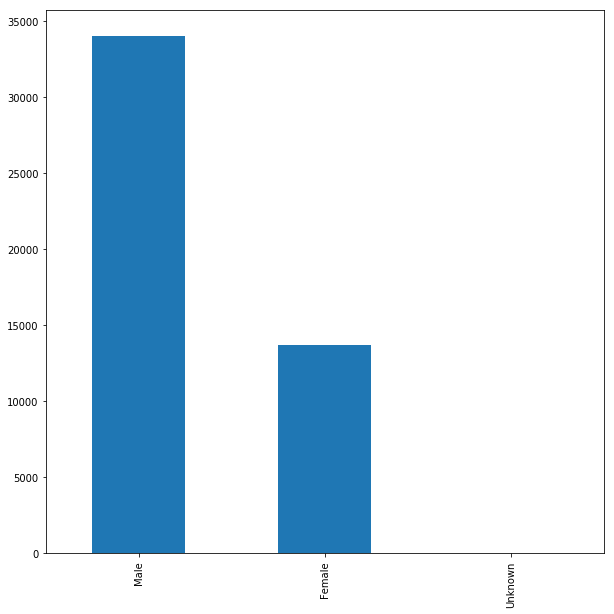

In [22]:
fatal_data["Gender"].value_counts().plot(kind="bar")

In [69]:
male_fatality = 34027
female_fatality = 13691
unknown_fatality = 22
total_sum = 47740

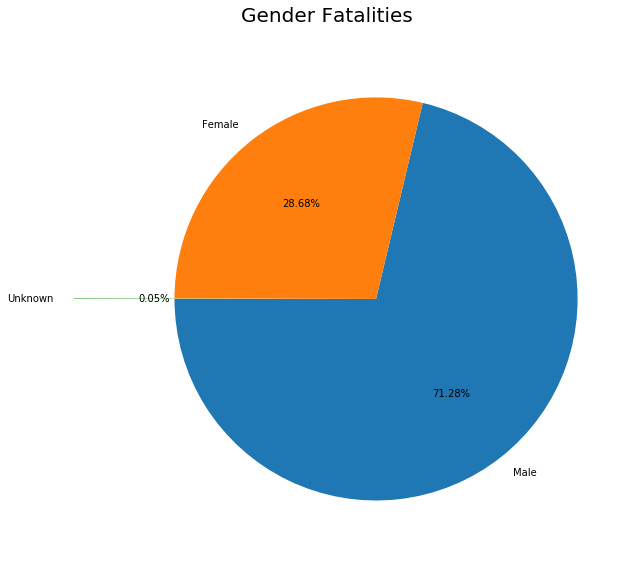

In [89]:
labels = 'Male', 'Female', 'Unknown'
sizes = [(male_fatality/total_sum), (female_fatality/total_sum), (unknown_fatality/total_sum)]
explode = (0, 0, 0.5)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode= explode, labels=labels, autopct='%1.2f%%',
        shadow=False, startangle=180)
ax1.axis('equal')
plt.title("Gender Fatalities",fontsize=20)

plt.show()

In [36]:
fatal_data.columns

Index([u'CrashID', u'State', u'Day', u'Month', u'Year', u'Hour', u'Minute',
       u'Crash_Type', u'Bus_Involvement', u'Heavy_Rigid_Truck_Involvement',
       u'Articulated_Truck_Involvement', u'Speed_Limit', u'Road_User',
       u'Gender', u'Age'],
      dtype='object')

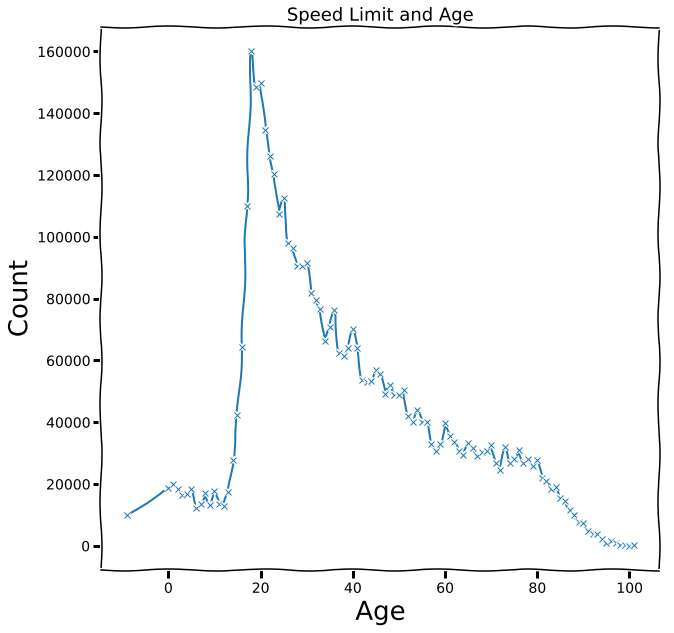

In [102]:
data_crash = fatal_data[["Age","Speed_Limit"]].groupby("Age").sum()

plt.xkcd()
plt.plot(data_crash, "x-")
plt.title("Speed Limit and Age", fontsize=18)
plt.xlabel('Age', fontsize=26)
plt.ylabel('Count', fontsize=26)
plt.grid(True)
plt.show()